# Brain Strokes Datasets 

## EDA 

In [60]:
#Importing necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
%matplotlib inline


In [61]:
#reading the file
df = pd.read_csv('brain_stroke.csv')
#viewing the first 5 rows 
df.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [62]:
df.shape
#4981 rows
#11 columns 

(4981, 11)

In [63]:
df.isna().sum() 
#Returns zero nulls however we need to replace blank spaces with NaNs 

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [64]:
#replacing blanks, if any, with NaN's
df.replace('', np.NaN, inplace=True)   

In [65]:
df.nunique() #checking how many diff variation of inputs in each column 

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [66]:
#Initial thoughts - we cannot replace some zeros as they are in binary / true or false
#We can use one hot encoder for the Gender as Male and Female as only two categories present 
#Similarly if previously married and residence type can be changed to intiger representation using OHE
#Label encoding for work type, and smoking status
#Relevancy of ever married column and residency type

#Binary inputs 0 and 1 for 0 being not affected or didnt occur while 1 being affected 
 

In [67]:
df.info  

<bound method DataFrame.info of       gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1       Male  80.0             0              1          Yes        Private   
2     Female  49.0             0              0          Yes        Private   
3     Female  79.0             1              0          Yes  Self-employed   
4       Male  81.0             0              0          Yes        Private   
...      ...   ...           ...            ...          ...            ...   
4976    Male  41.0             0              0           No        Private   
4977    Male  40.0             0              0          Yes        Private   
4978  Female  45.0             1              0          Yes       Govt_job   
4979    Male  40.0             0              0          Yes        Private   
4980  Female  80.0             1              0          Yes        Private   

     Residence_type

In [68]:
df.describe()  #Quick aggregations on the numerical data 

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [69]:
#Mean age of people in the dataset were 43 years old with the eldest being 82 and youngest being less than 1 

In [70]:
df['stroke'].value_counts() #248 people had suffered from a stroke and 4733 did not  

0    4733
1     248
Name: stroke, dtype: int64

In [71]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Quick Visualisations

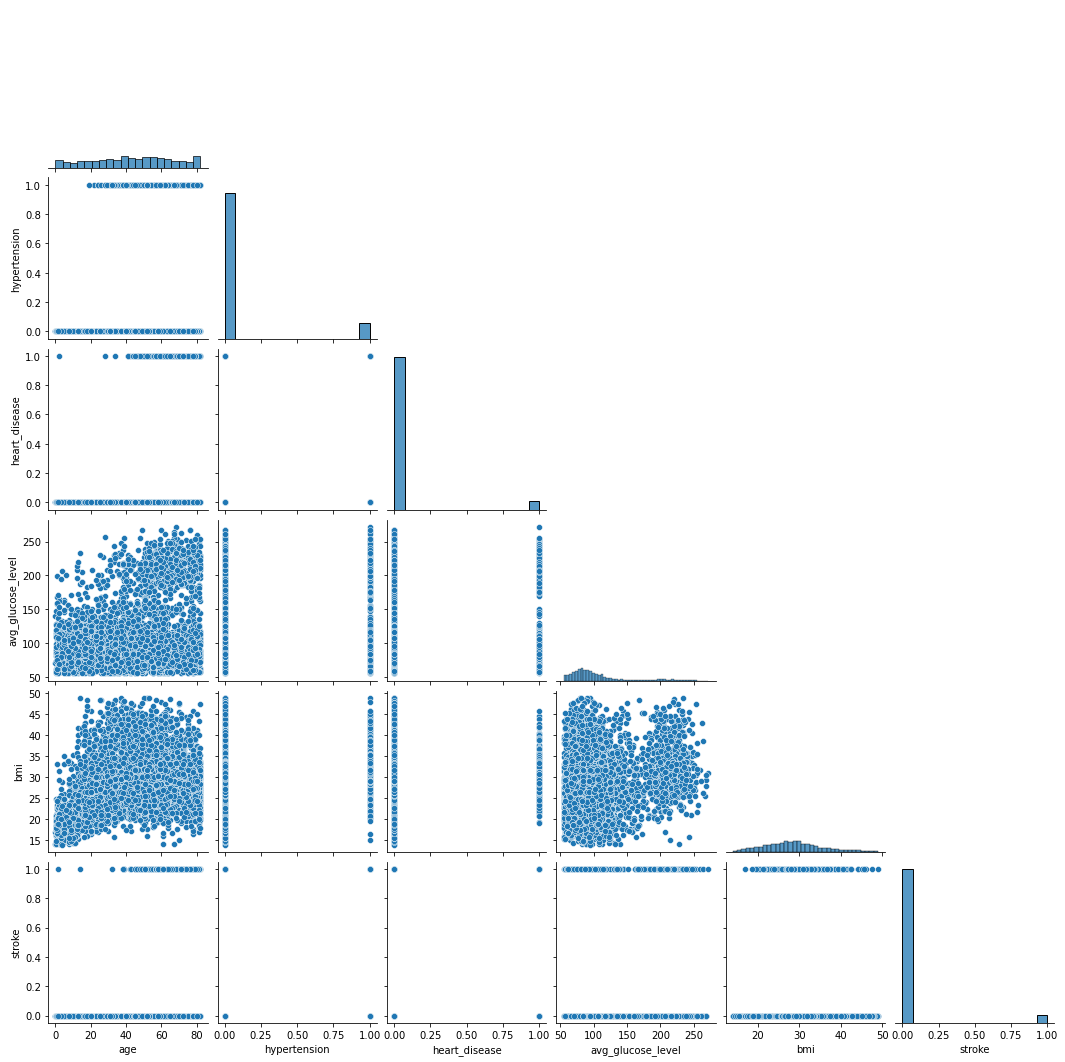

In [72]:
#Distributions
sns.pairplot(df,corner=True);  

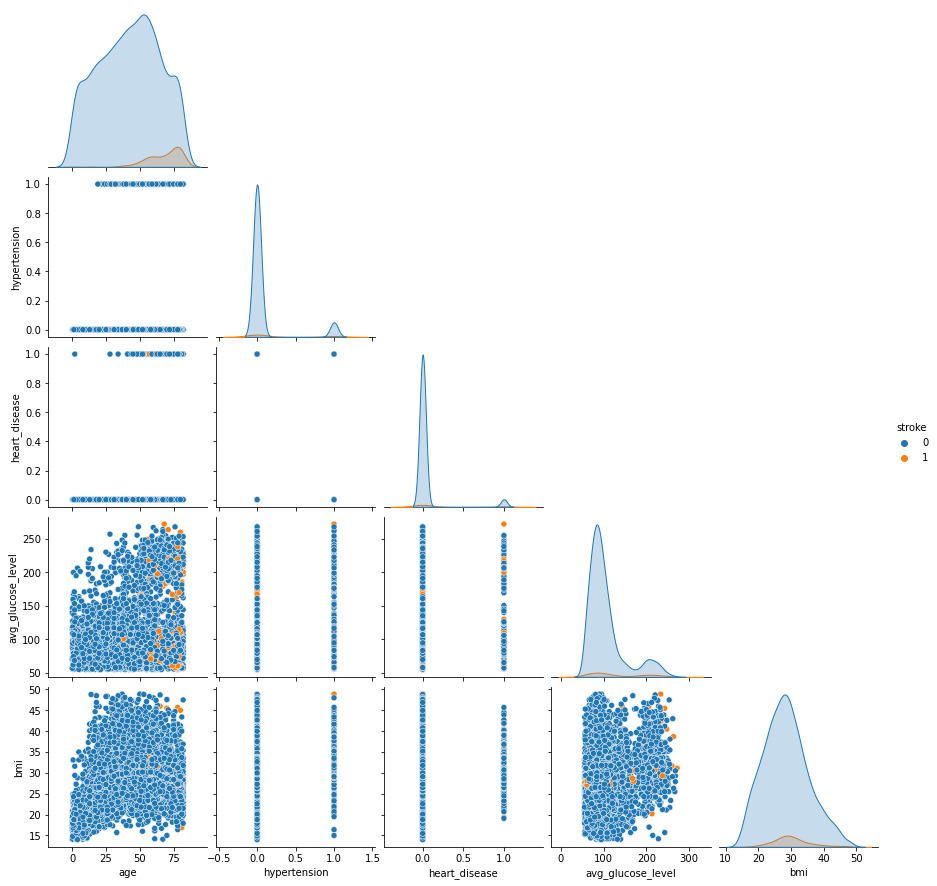

In [73]:
#Distributions with hue as stroke
sns.pairplot(df, hue='stroke' , corner=True); #more elderly people suffered strokes 

Text(0.5, 1.0, 'Age and gender distribution in the Brain Strokes dataset')

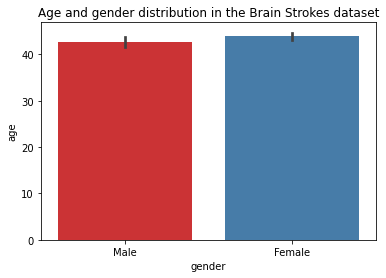

In [74]:
#Distribution of Males and Females in the dataset  
sns.barplot(x='gender', y='age', data=df, palette='Set1') #More females in the data set 
plt.title('Age and gender distribution in the Brain Strokes dataset')

In [75]:
df['gender'].value_counts() #2907 females and 2074 males .4981 in total. 58% female in the dataset

Female    2907
Male      2074
Name: gender, dtype: int64

Text(0.5, 1.0, 'Age and gender of Brain Strokes dataset')

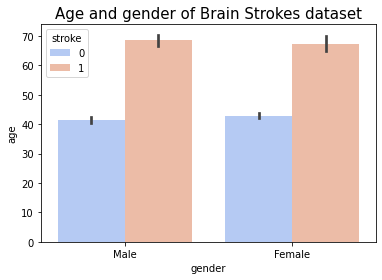

In [76]:
sns.barplot(x='gender', y='age', hue='stroke', data=df, palette='coolwarm')  
plt.title('Age and gender of Brain Strokes dataset', fontsize=15)   

Text(0.5, 1.0, 'Age and Stroke victims')

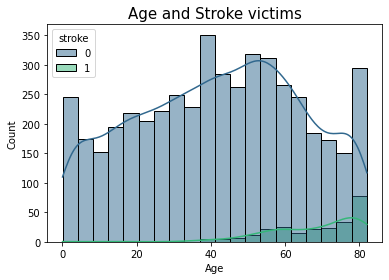

In [77]:
sns.histplot(x='age',data=df, hue='stroke', kde=True, palette='viridis') 
plt.xlabel('Age')
plt.ylabel('Count') 
plt.title('Age and Stroke victims', fontsize=15) 

Text(0.5, 1.0, 'Residency type and gender')

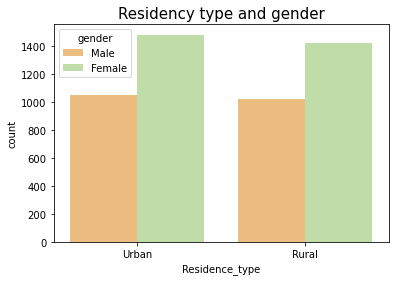

In [78]:
sns.countplot(x='Residence_type', data=df, hue='gender', palette='Spectral')  
plt.title('Residency type and gender', fontsize=15) 

Text(0, 0.5, 'count')

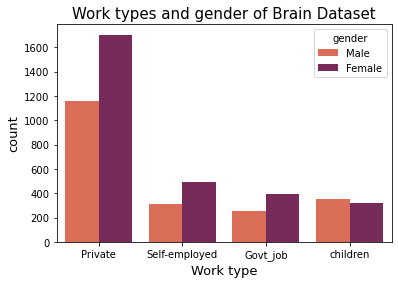

In [79]:
sns.countplot(x='work_type', data=df, hue='gender', palette='rocket_r')  
plt.title('Work types and gender of Brain Dataset', fontsize=15)
plt.xlabel('Work type', fontsize=13) 
plt.ylabel('count', fontsize=13)

Text(0.5, 1.0, 'Stroke vs age and average glucose level')

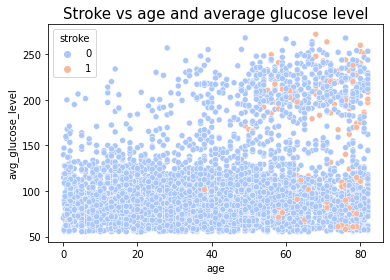

In [80]:
sns.scatterplot(x='age', y='avg_glucose_level', data=df, hue='stroke', palette='coolwarm') 
plt.title('Stroke vs age and average glucose level', fontsize=15) 
#99 or lower normal.
#100 to 125 mg/dL indicates you have prediabetes, 
#and 126 mg/dL or higher indicates you have diabetes.
#it seems that an evrage glucose level of 150 slighly increases the chance of having a stroke, particularly for age>50

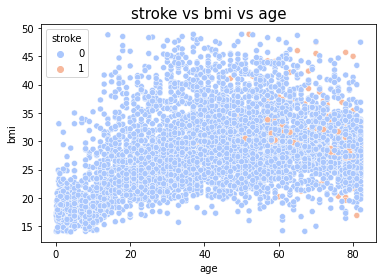

In [81]:
sns.scatterplot(x='age', y='bmi', data=df, hue='stroke', palette='coolwarm') 
plt.title('stroke vs bmi vs age', fontsize=15);  

<AxesSubplot:>

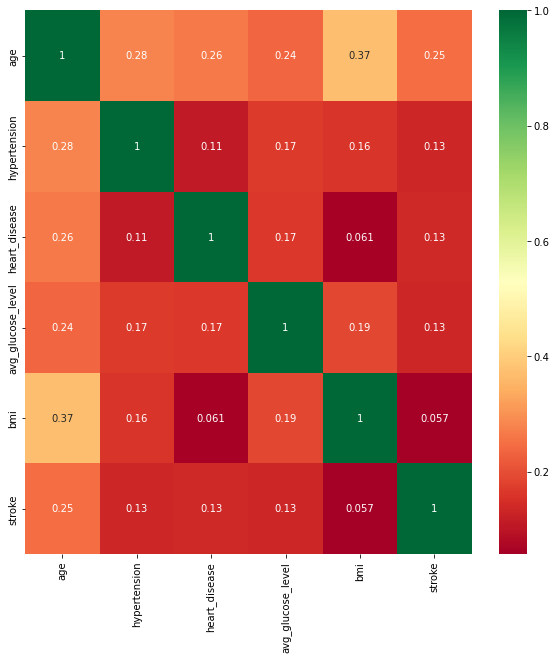

In [82]:
df.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')  

## Train-Test-Split  

In [83]:
#Before splitting we should change all Categorical data inputs to numerical data in order to train and test.

In [84]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
df = df.apply(labelencoder.fit_transform) 
df 
#Now the whole dataframe has had all its categorical data label encoded

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,1,1,3769,225,1,1
1,1,101,0,1,1,1,0,2444,184,2,1
2,0,70,0,0,1,1,1,3324,203,3,1
3,0,100,1,0,1,2,0,3333,99,2,1
4,1,102,0,0,1,1,1,3386,149,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,62,0,0,0,1,0,576,157,1,0
4977,1,61,0,0,1,1,1,3414,170,3,0
4978,0,66,1,0,1,0,0,1947,177,3,0
4979,1,61,0,0,1,1,0,1350,159,3,0


In [85]:
#scaling down
df_numeric = df[:]
df.head()    

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,1,1,3769,225,1,1
1,1,101,0,1,1,1,0,2444,184,2,1
2,0,70,0,0,1,1,1,3324,203,3,1
3,0,100,1,0,1,2,0,3333,99,2,1
4,1,102,0,0,1,1,1,3386,149,1,1


In [86]:
df 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,1,1,3769,225,1,1
1,1,101,0,1,1,1,0,2444,184,2,1
2,0,70,0,0,1,1,1,3324,203,3,1
3,0,100,1,0,1,2,0,3333,99,2,1
4,1,102,0,0,1,1,1,3386,149,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,62,0,0,0,1,0,576,157,1,0
4977,1,61,0,0,1,1,1,3414,170,3,0
4978,0,66,1,0,1,0,0,1947,177,3,0
4979,1,61,0,0,1,1,0,1350,159,3,0


In [87]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_mms = mms.fit_transform(df)
df_mms[0:2] 
#All between 0 and 1 when scaling 

array([[1.        , 0.85436893, 0.        , 1.        , 1.        ,
        0.33333333, 1.        , 0.96789933, 0.65982405, 0.33333333,
        1.        ],
       [1.        , 0.98058252, 0.        , 1.        , 1.        ,
        0.33333333, 0.        , 0.62763225, 0.53958944, 0.66666667,
        1.        ]])

(array([[2907.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2074.],
        [  41.,   57.,  361.,  529.,  532.,  658.,  794.,  790.,  573.,
          646.],
        [4502.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          479.],
        [4706.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          275.],
        [1701.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3280.],
        [ 644.,    0.,    0., 2860.,    0.,    0.,  804.,    0.,    0.,
          673.],
        [2449.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2532.],
        [ 495.,  527.,  548.,  594.,  576.,  498.,  489.,  446.,  401.,
          407.],
        [ 212.,  473.,  730.,  962., 1003.,  715.,  403.,  250.,  162.,
           71.],
        [1500.,    0.,    0.,  867.,    0.,    0., 1838.,    0.,    0.,
          776.],
        [4733.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          248.]]),
 array([0. , 0.1, 0

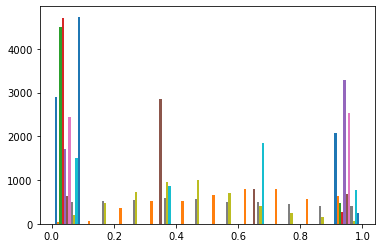

In [88]:
plt.hist(df_mms)  

In [89]:
df = pd.DataFrame(df_mms) #applying the array to the df  
df 

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.854369,0.0,1.0,1.0,0.333333,1.0,0.967899,0.659824,0.333333,1.0
1,1.0,0.980583,0.0,1.0,1.0,0.333333,0.0,0.627632,0.539589,0.666667,1.0
2,0.0,0.679612,0.0,0.0,1.0,0.333333,1.0,0.853621,0.595308,1.000000,1.0
3,0.0,0.970874,1.0,0.0,1.0,0.666667,0.0,0.855932,0.290323,0.666667,1.0
4,1.0,0.990291,0.0,0.0,1.0,0.333333,1.0,0.869543,0.436950,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,0.601942,0.0,0.0,0.0,0.333333,0.0,0.147920,0.460411,0.333333,0.0
4977,1.0,0.592233,0.0,0.0,1.0,0.333333,1.0,0.876733,0.498534,1.000000,0.0
4978,0.0,0.640777,1.0,0.0,1.0,0.000000,0.0,0.500000,0.519062,1.000000,0.0
4979,1.0,0.592233,0.0,0.0,1.0,0.333333,0.0,0.346687,0.466276,1.000000,0.0


In [90]:
#column names as we lost them
#gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke

In [91]:
df.rename({0:'gender',1:'age', 2:'hypertension', 3:'heart_disease', 4:'ever_married', 5:'work_type', 6:'Residence_type', 7:'avg_glucose_level', 8:'bmi', 9:'smoking_status', 10:'stroke'}, axis=1, inplace=True)

In [92]:
df #Our new normalised data 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,0.854369,0.0,1.0,1.0,0.333333,1.0,0.967899,0.659824,0.333333,1.0
1,1.0,0.980583,0.0,1.0,1.0,0.333333,0.0,0.627632,0.539589,0.666667,1.0
2,0.0,0.679612,0.0,0.0,1.0,0.333333,1.0,0.853621,0.595308,1.000000,1.0
3,0.0,0.970874,1.0,0.0,1.0,0.666667,0.0,0.855932,0.290323,0.666667,1.0
4,1.0,0.990291,0.0,0.0,1.0,0.333333,1.0,0.869543,0.436950,0.333333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1.0,0.601942,0.0,0.0,0.0,0.333333,0.0,0.147920,0.460411,0.333333,0.0
4977,1.0,0.592233,0.0,0.0,1.0,0.333333,1.0,0.876733,0.498534,1.000000,0.0
4978,0.0,0.640777,1.0,0.0,1.0,0.000000,0.0,0.500000,0.519062,1.000000,0.0
4979,1.0,0.592233,0.0,0.0,1.0,0.333333,0.0,0.346687,0.466276,1.000000,0.0


## Splitting the data

In [93]:
#Splitting the data
X = df.iloc[:,:-1]  #Every column and row bar the last column (which is our target variable)
y = df['stroke']    #Target variable (Dependent variable)
                    #Alternatively y = df.iloc[:,-1] 
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 
#test size 20%, training 80%    
#3984 

(3984, 10) (997, 10) (3984,) (997,)


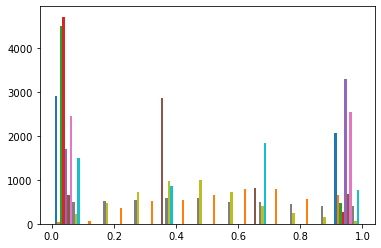

In [94]:
plt.hist(X); 

In [95]:
##Validating the split:
len(X), len(X_train), len(y_train), len(y_test)   

(4981, 3984, 3984, 997)

## KNN

In [96]:
#calculating the k value
import math
math.sqrt(len(y_test)) 

31.575306807693888

In [97]:
# Create KNN Object
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean') #p value indicates two options
classifier 


KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [98]:
# Train model
classifier.fit(X_train, y_train)  

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [99]:
#collecting the predictions
y_pred_knn = classifier.predict(X_test) 
y_pred_knn, y_test


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [100]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_knn) 

array([[942,   1],
       [ 54,   0]], dtype=int64)

In [101]:
# F1 score
print(f1_score(y_test, y_pred_knn, average='weighted'))  

0.9190087022283974


In [102]:
# Accuracy 
print(accuracy_score(y_test, y_pred_knn)) 

0.9448345035105316


In [103]:
print(classification_report(y_test, y_pred_knn))  #V good classifier  

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       943
         1.0       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.89      0.94      0.92       997



## Decision Trees 

In [104]:
# import decisiontreeclassifier from sklearn
from sklearn.tree import DecisionTreeClassifier

In [105]:
# create decisiontreeclassifier object
dtree = DecisionTreeClassifier() 
dtree 

DecisionTreeClassifier()

In [106]:
##X_train, X_test, y_train, y_test
dtree.fit(X_train, y_train)  

DecisionTreeClassifier()

In [107]:
import math 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report  

In [108]:
y_pred = dtree.predict(X_test) # X_test is going to be predicted for y 
list(zip(y_pred, y_test))   

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 0.0),

In [109]:
print(classification_report(y_test, y_pred))  #V good classifier  

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       943
         1.0       0.24      0.20      0.22        54

    accuracy                           0.92       997
   macro avg       0.60      0.58      0.59       997
weighted avg       0.92      0.92      0.92       997



## Random Forest Classifier 

In [110]:
# making classifier object
rf = RandomForestClassifier(n_jobs=2,random_state=42)
# training classifier
rf.fit(X_train,y_train) 

RandomForestClassifier(n_jobs=2, random_state=42)

In [111]:
pred_rf = rf.predict(X_test)
list(zip(pred_rf,y_test))  

[(0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),

In [112]:
## Evaluating the success of the random forest classifier
##Lets look at the performance indexes
print(classification_report(y_test,pred_rf)) 

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       943
         1.0       0.00      0.00      0.00        54

    accuracy                           0.94       997
   macro avg       0.47      0.50      0.48       997
weighted avg       0.89      0.94      0.92       997



In [113]:
print(accuracy_score(y_test, pred_rf))   

0.9408224674022067


In [114]:
##Looking at the confusion matrix
confusion_matrix(y_test, y_pred)  

array([[908,  35],
       [ 43,  11]], dtype=int64)

(array([[2320.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         1664.],
        [  34.,   42.,  295.,  431.,  429.,  518.,  631.,  630.,  444.,
          530.],
        [3619.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          365.],
        [3765.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          219.],
        [1367.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2617.],
        [ 520.,    0.,    0., 2284.,    0.,    0.,  634.,    0.,    0.,
          546.],
        [1980.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2004.],
        [ 388.,  425.,  443.,  489.,  455.,  406.,  377.,  355.,  321.,
          325.],
        [ 168.,  385.,  580.,  762.,  788.,  575.,  328.,  205.,  139.,
           54.],
        [1196.,    0.,    0.,  698.,    0.,    0., 1476.,    0.,    0.,
          614.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 BarContainer objects>)

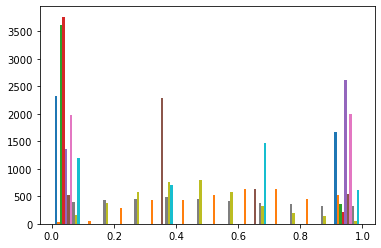

In [115]:
plt.hist(X_train)

In [116]:
# Import metrics from sklearn 
from sklearn import metrics

In [117]:
# Create a new regressor object for MLR 
# Train the new regressor
from sklearn.linear_model import LinearRegression
slr = LinearRegression()  
slr.fit(X_train, y_train) 

LinearRegression()

In [118]:
x_train=np.arange(0,len(X_train),1) 

In [119]:
X_train.values, slr.predict(X_train) 

(array([[0.        , 0.45631068, 0.        , ..., 0.85053929, 0.25806452,
         0.66666667],
        [0.        , 0.46601942, 0.        , ..., 0.29481253, 0.75366569,
         1.        ],
        [1.        , 0.72815534, 0.        , ..., 0.40138675, 0.49853372,
         1.        ],
        ...,
        [1.        , 0.33009709, 0.        , ..., 0.44119158, 0.08211144,
         0.66666667],
        [0.        , 0.04854369, 0.        , ..., 0.73112481, 0.09677419,
         0.        ],
        [0.        , 0.75728155, 0.        , ..., 0.77632255, 0.58944282,
         0.66666667]]),
 array([ 0.0349456 , -0.04078459,  0.03391851, ..., -0.01415657,
        -0.05624989,  0.07219921]))

In [120]:
predictions = slr.predict(X_test) 
predictions  

array([ 1.60907924e-01,  2.18967738e-03, -2.99554932e-02,  2.81759382e-02,
        9.53529579e-02,  1.33826117e-01,  7.85487948e-03,  9.10713916e-02,
        2.01966361e-02,  1.15152679e-02,  4.12153388e-02,  7.66389008e-02,
       -1.40675977e-02, -5.24623971e-03,  1.05341698e-01, -1.72407270e-02,
        3.17505118e-02,  1.61658706e-01,  1.69658464e-02, -1.02787909e-02,
        9.97813157e-03, -6.80372343e-03, -1.00355168e-03, -1.24795469e-02,
        1.49776923e-01,  2.70884876e-02,  3.95821573e-02,  9.36525740e-02,
        2.32187367e-01,  7.73974299e-02,  7.84977480e-02,  4.18130110e-02,
        7.22461648e-02, -6.18651824e-03,  6.24873203e-02,  1.59433646e-03,
        3.03394266e-02,  1.02163528e-02,  6.04862324e-02, -5.72905029e-03,
       -7.14686607e-03,  2.11333226e-02,  9.02839905e-02,  1.71601445e-01,
       -9.16859284e-03,  5.31880281e-02,  1.09701168e-01,  4.82643797e-02,
        8.21960861e-02, -2.04354022e-03,  9.98563507e-02,  5.53290761e-03,
        2.12882037e-03,  

In [121]:
#corr_matrix = np.corrcoef(X_test, y_pred)
#corr = corr_matrix[0,1]
#R_sq = corr**2

#print(R_sq) 

In [122]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))   

MAE: 0.09864822884724292
MSE: 0.046808981429110344
RMSE: 0.21635383386737186


In [123]:
pd.crosstab(y_test, y_pred, rownames=['Actual Strokes'],colnames=['Prediced Strokes'] ) 

Prediced Strokes,0.0,1.0
Actual Strokes,,
0.0,908,35
1.0,43,11


In [124]:
##The random forest classifier performs the best

In [125]:
## We can also retrain with a new K value - the one calc in the import math section as 31

In [126]:
#x_train=np.arange(0,len(X_train),1) 

In [127]:
#slr.intercept_

-0.12064546237607718

In [128]:
#slr.coef_ 

array([ 0.00457015,  0.27629754,  0.04372028,  0.02918214, -0.03174976,
        0.02357691,  0.00760475,  0.04199517, -0.03407473, -0.01931285])